In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from tqdm import tqdm
import math
from scipy import stats
%config InlineBackend.figure_format='retina'
from sklearn.linear_model import LinearRegression

In [12]:
data = '/home/cellatlas/human/data'

In [13]:
organs = [d for d in os.listdir(data) if "." not in d]

In [14]:
results = []

In [15]:
results = []
for organ in tqdm(organs):
    observations = [o for o in os.listdir(os.path.join(data, organ)) if os.path.exists(os.path.join(data, organ, o, "metrics/kb_info.json"))]

    for observation in observations:
        obs_results = []
        path = os.path.join(data, organ, observation, 'metrics', 'kb_info.json')
        with open(path) as json_file:
            kb = json.load(json_file)
        path = os.path.join(data, organ, observation, 'metrics', 'run_info.json')
        with open(path) as json_file:
            run = json.load(json_file)
        obs_results.extend([organ, observation])
        obs_results.extend([run['n_processed']])
        obs_results.extend(kb['runtimes'])

        results.append(obs_results)
            

100%|██████████| 28/28 [00:00<00:00, 329.29it/s]


In [17]:
#Get name of commands

command_names = [("_").join(c.split(' ')[0:2]) for c in kb['commands']]

column_names = ['organ', 'observation', 'n_processed']
column_names.extend(command_names)

In [18]:
command_names

['kallisto_bus',
 'bustools_inspect',
 'bustools_sort',
 'bustools_inspect',
 'bustools_inspect',
 'bustools_correct',
 'bustools_inspect',
 'bustools_sort',
 'bustools_inspect',
 'bustools_count',
 'bustools_whitelist',
 'bustools_correct',
 'bustools_inspect',
 'bustools_sort',
 'bustools_inspect',
 'bustools_count']

In [19]:
results_df = pd.DataFrame(results)
# Remove celseq samples with an extra command
results_df = results_df[np.isnan(results_df[19])]
results_df = results_df.drop(columns = 19)

In [20]:
results_df.columns = column_names

In [21]:
results_df

,organ,observation,n_processed,kallisto_bus,bustools_inspect,bustools_sort,bustools_inspect,bustools_inspect,bustools_correct,bustools_inspect,bustools_sort,bustools_inspect,bustools_count,bustools_whitelist,bustools_correct,bustools_inspect,bustools_sort,bustools_inspect,bustools_count
0,ovary,GSM3319036,43168993,411.926095,8.825016,10.849657,2.620420,5.475670,3.838580,2.479271,6.960848,2.558997,7.027142,0.806595,5.324364,2.345135,8.778652,2.445238,6.623405
1,ovary,GSM3319047,43700084,460.471448,2.470986,6.326633,0.486492,2.096477,1.003476,0.454874,2.048423,0.463397,2.951870,0.034123,0.265097,0.205240,1.805863,0.188707,2.747975
2,ovary,GSM3557972,172323080,1449.735019,17.747276,29.327213,2.030922,5.314288,2.883356,1.752512,5.485734,1.817624,5.149989,0.435270,1.507827,1.235806,4.621485,1.297348,4.368130
3,ovary,GSM3557967,197300331,1718.018319,8.348474,16.930099,1.167332,3.143285,1.408527,1.120900,2.644529,0.934769,3.364758,0.051272,0.295599,0.428473,1.733987,0.388663,2.375706
4,ovary,GSM3557961,198516721,1863.909564,20.938246,33.804060,1.945068,4.739490,2.165226,1.864026,4.371249,1.761111,4.503542,0.169965,0.952361,1.425822,3.594424,1.332520,3.654994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,peritoneal,GSM3755696,317938826,3084.349800,115.440096,122.886217,8.210879,15.980525,17.923244,7.467042,29.535050,6.623793,17.399973,4.164878,17.409055,5.264955,21.418828,5.151339,11.773341
521,peritoneal,GSM3755692,443305098,1749.456061,63.832492,101.697711,7.035403,8.830643,13.039833,7.831177,31.673147,6.531506,23.560770,1.673902,12.137726,7.431721,25.795759,6.632214,20.653092
522,peritoneal,GSM3755693,326339254,1429.680848,41.104952,74.261039,7.357838,8.233814,12.070567,7.035911,29.478498,7.079253,26.186508,1.918796,14.643728,6.236737,24.665207,6.729292,20.671551
523,peritoneal,GSM3755697,331852037,1378.596774,44.684919,351.882181,6.008526,6.542766,176.427303,5.722195,163.391293,5.851601,28.656934,1.638249,354.841520,5.217457,382.574502,6.420644,19.346452


## Total time

In [ ]:
results_df['total_time'] = results_df.iloc[:,3:].sum(axis=1)

In [ ]:
results_df

,organ,observation,n_processed,kallisto_bus,bustools_inspect,bustools_sort,bustools_inspect,bustools_inspect,bustools_correct,bustools_inspect,bustools_sort,bustools_inspect,bustools_count,bustools_whitelist,bustools_correct,bustools_inspect,bustools_sort,bustools_inspect,bustools_count,total_time
0,ovary,GSM3319036,43168993,411.926095,8.825016,10.849657,2.620420,5.475670,3.838580,2.479271,6.960848,2.558997,7.027142,0.806595,5.324364,2.345135,8.778652,2.445238,6.623405,488.885085
1,ovary,GSM3319047,43700084,460.471448,2.470986,6.326633,0.486492,2.096477,1.003476,0.454874,2.048423,0.463397,2.951870,0.034123,0.265097,0.205240,1.805863,0.188707,2.747975,484.021082
2,ovary,GSM3557972,172323080,1449.735019,17.747276,29.327213,2.030922,5.314288,2.883356,1.752512,5.485734,1.817624,5.149989,0.435270,1.507827,1.235806,4.621485,1.297348,4.368130,1534.709799
3,ovary,GSM3557967,197300331,1718.018319,8.348474,16.930099,1.167332,3.143285,1.408527,1.120900,2.644529,0.934769,3.364758,0.051272,0.295599,0.428473,1.733987,0.388663,2.375706,1762.354692
4,ovary,GSM3557961,198516721,1863.909564,20.938246,33.804060,1.945068,4.739490,2.165226,1.864026,4.371249,1.761111,4.503542,0.169965,0.952361,1.425822,3.594424,1.332520,3.654994,1951.131668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,peritoneal,GSM3755696,317938826,3084.349800,115.440096,122.886217,8.210879,15.980525,17.923244,7.467042,29.535050,6.623793,17.399973,4.164878,17.409055,5.264955,21.418828,5.151339,11.773341,3490.999017
521,peritoneal,GSM3755692,443305098,1749.456061,63.832492,101.697711,7.035403,8.830643,13.039833,7.831177,31.673147,6.531506,23.560770,1.673902,12.137726,7.431721,25.795759,6.632214,20.653092,2087.813155
522,peritoneal,GSM3755693,326339254,1429.680848,41.104952,74.261039,7.357838,8.233814,12.070567,7.035911,29.478498,7.079253,26.186508,1.918796,14.643728,6.236737,24.665207,6.729292,20.671551,1717.354540
523,peritoneal,GSM3755697,331852037,1378.596774,44.684919,351.882181,6.008526,6.542766,176.427303,5.722195,163.391293,5.851601,28.656934,1.638249,354.841520,5.217457,382.574502,6.420644,19.346452,2937.803314


In [ ]:
results_df['n_processed'].sum() 

147605874782

## Plots

y 770.31 + 0.0x


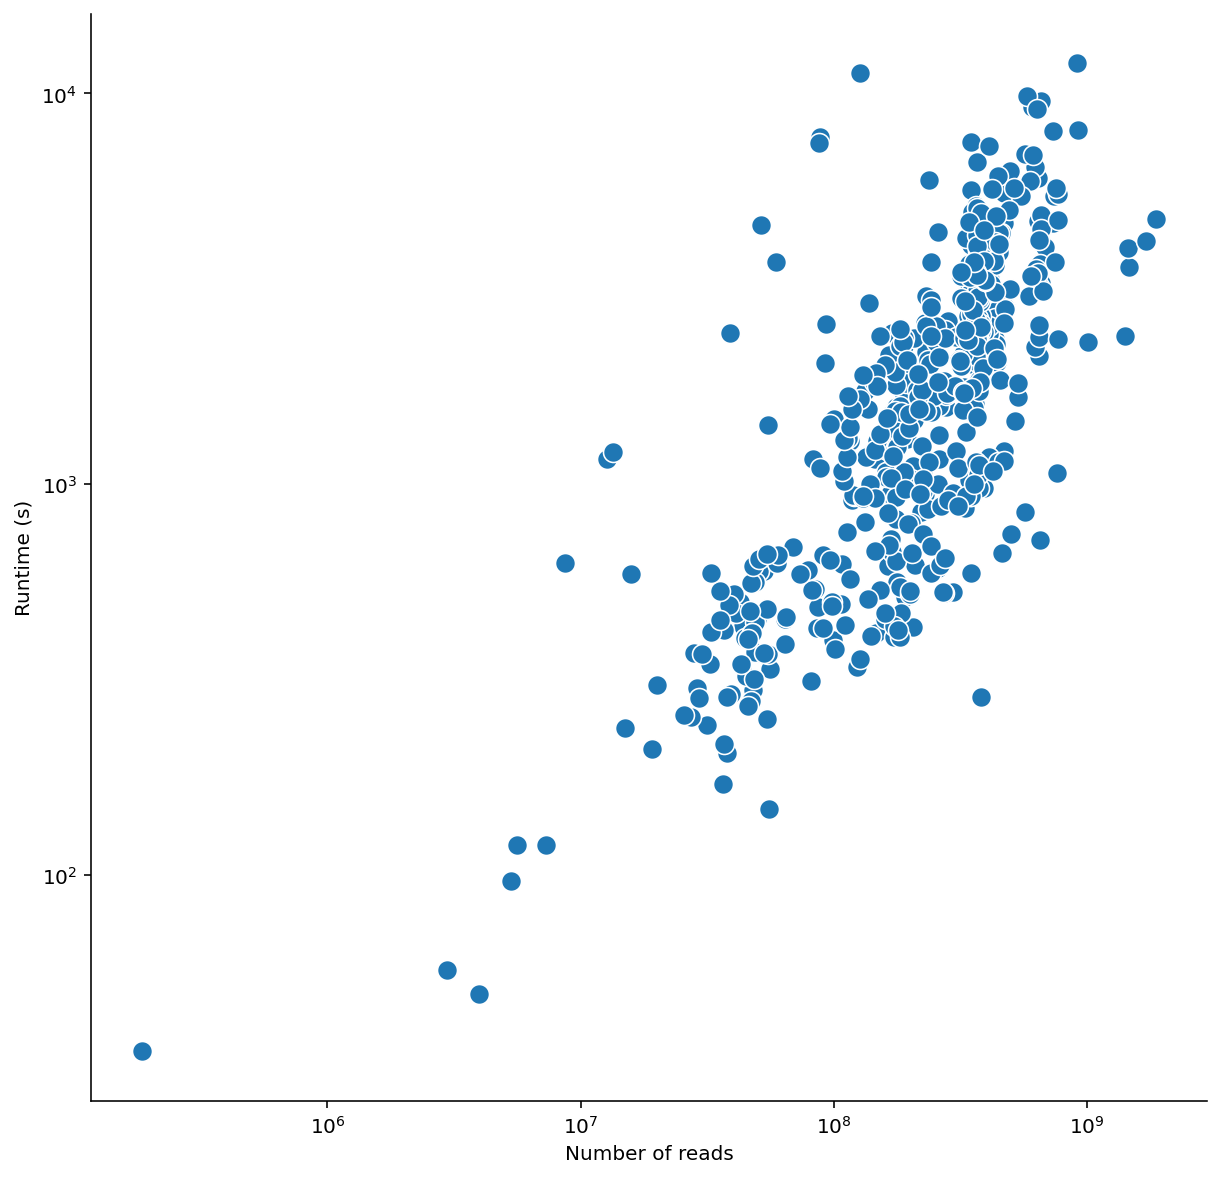

In [32]:
fig, ax = plt.subplots(figsize = (10, 10))
x = results_df['n_processed']# / 100e6
y = results_df['total_time']

slope, intercept, r, p, std_err = stats.linregress(x,y)
def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))


sns.scatterplot(data =results_df, x = x, y = y, palette = 'black', s = 100)

sns.despine()
ax.set_ylabel('Runtime (s)')
ax.set_xlabel('Number of reads')

ax.set_yscale('log')
ax.set_xscale('log')
print(f'y {round(intercept, 2)} + {round(slope,2)}x')


# Model by 100M reads

slope, intercept, r, p, std_err = stats.linregress(x,y)
def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x/100e6))
plt.minorticks_off()
!mkdir -p figures
plt.savefig('figures/fig_s1.png')

In [30]:
x_logged = np.log(results_df['n_processed'] / 100e6)
y_logged = np.log(results_df['total_time'])

slope, intercept, r, p, std_err = stats.linregress(x_logged,y_logged)
def myfunc(x):
  return slope * x + intercept

mymodel_log = list(map(myfunc, x))

## Time per 100M reads

In [330]:
x = [math.log(t, 100e6) for t in results_df['n_processed'].values]
y = np.log10(results_df['total_time'].values)
slope, intercept, r, p, std_err = stats.linregress(x,y)

0.5927234184039623


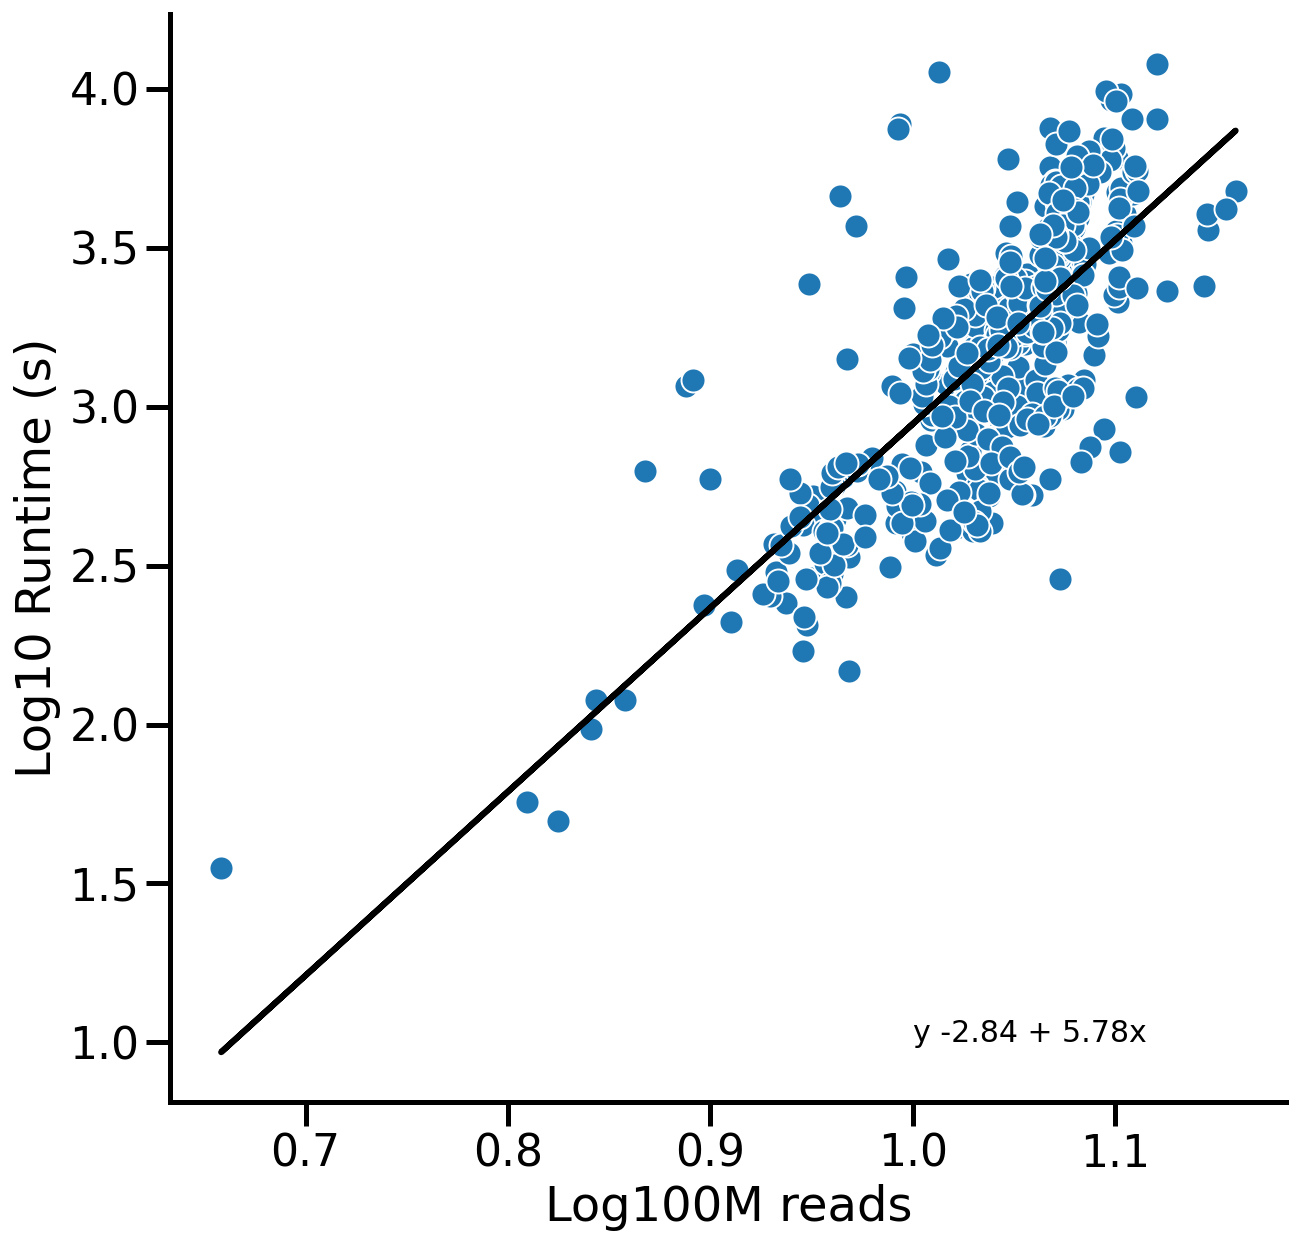

In [335]:
sns.set_context('poster')
def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

fig, ax = plt.subplots(figsize = (10,10))
sns.scatterplot(x = x, y = y, palette = 'black')

sns.despine()
ax.set_ylabel('Log10 Runtime (s)')
ax.set_xlabel('Log100M reads')

ax.plot(x, mymodel, c = 'black')
ax.text(1,1, f'y {round(intercept, 2)} + {round(slope,2)}x', fontsize=15)
print(r**2)